## Suicide Rate and Socioecomic Indicators by Country

Suicide has become a huge challenge to public mental health in every country. With regard to suicide prevention, it is crucial to identify whether any particular sociodemographic characteristics, such as income inequality, poverty, and unemployment rate, correlate with the high number of suicide rates. The relation between suicide rate and socio-economic indicators are explored in this analysis.

In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from common_lib.data_reader import *

### Suicide Rate and Income Inequality (GINI)

In [2]:
#load the socioeconomic indicators to a data.frame
#SuicideDataReader is a defined class/module to read the data from the data sources
reader = SuicideDataReader()
socioeconomic = reader.read_data(SuicideRawData.SOCIOECONOMIC)
socioeconomic

,country,country_code,gini_latest_year,gini_coef,poverty_latest_year,poverty_199,poverty_320
0,Albania,ALB,2012,29.0,2017,1.3,8.2
1,Algeria,DZA,2011,27.6,2011,0.4,3.7
2,Angola,AGO,2008,42.7,2018,51.8,73.2
3,Argentina,ARG,2014,42.7,2018,1.3,3.9
4,Armenia,ARM,2015,32.4,2018,1.4,9.4
...,...,...,...,...,...,...,...
138,Uzbekistan,UZB,2003,35.3,2003,61.6,86.2
139,Vanuatu,VUT,2010,37.3,2010,13.2,39.4
140,Vietnam,VNM,2014,34.8,2018,1.9,6.8
141,Zambia,ZMB,2015,57.1,2015,58.7,75.4


In [3]:
#load the suicide rate to a data.frame
#SuicideDataReader is a defined class/module to read the data from the data sources
suiciderate = reader.read_data(SuicideRawData.SUICIDE_RATES, tidy = True)

#assuming that only workforces that able to gain/receive an income
#we will calculate the suicide rate on working-age only (as each country has a different legal working age, 
#we will select the 20 - 59 years of age)
suiciderate = suiciderate[suiciderate['age_range'].isin(['50to59','40to49','30to39','20to29'])]\
                .groupby(['country','sex'], as_index = False)['suicide_rate'].sum()
suiciderate

,country,sex,suicide_rate
0,Afghanistan,Both sexes,31.6
1,Afghanistan,Female,10.1
2,Afghanistan,Male,51.2
3,Albania,Both sexes,29.5
4,Albania,Female,19.4
...,...,...,...
544,Zambia,Female,26.9
545,Zambia,Male,69.9
546,Zimbabwe,Both sexes,73.6
547,Zimbabwe,Female,34.7


In [4]:
#select the total suicide rate (male and female --> both sexes)
#no need to analyze by age at the moment
suiciderate_bothsexes = suiciderate[suiciderate['sex'] == 'Both sexes']
suiciderate_bothsexes

,country,sex,suicide_rate
0,Afghanistan,Both sexes,31.6
3,Albania,Both sexes,29.5
6,Algeria,Both sexes,18.3
9,Angola,Both sexes,33.8
12,Antigua and Barbuda,Both sexes,0.0
...,...,...,...
534,Venezuela (Bolivarian Republic of),Both sexes,18.6
537,Viet Nam,Both sexes,35.3
540,Yemen,Both sexes,56.5
543,Zambia,Both sexes,47.7


In [5]:
#join both data frame for plotting purposes
suiciderate_socioeconomic = suiciderate_bothsexes.merge(socioeconomic, how = 'inner', on='country')
suiciderate_socioeconomic

,country,sex,suicide_rate,country_code,gini_latest_year,gini_coef,poverty_latest_year,poverty_199,poverty_320
0,Albania,Both sexes,29.5,ALB,2012,29.0,2017,1.3,8.2
1,Algeria,Both sexes,18.3,DZA,2011,27.6,2011,0.4,3.7
2,Angola,Both sexes,33.8,AGO,2008,42.7,2018,51.8,73.2
3,Argentina,Both sexes,45.4,ARG,2014,42.7,2018,1.3,3.9
4,Armenia,Both sexes,27.3,ARM,2015,32.4,2018,1.4,9.4
...,...,...,...,...,...,...,...,...,...
128,Uruguay,Both sexes,87.7,URY,2015,41.7,2018,0.1,0.4
129,Uzbekistan,Both sexes,37.1,UZB,2003,35.3,2003,61.6,86.2
130,Vanuatu,Both sexes,21.9,VUT,2010,37.3,2010,13.2,39.4
131,Zambia,Both sexes,47.7,ZMB,2015,57.1,2015,58.7,75.4


<function matplotlib.pyplot.show(close=None, block=None)>

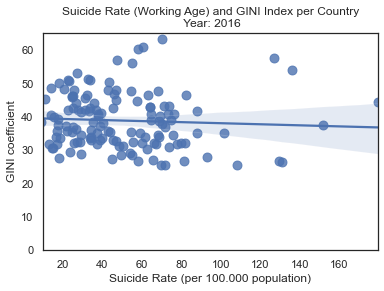

In [6]:
#plotting
sns.set_theme(style='white')

#plot suicide rate with GINI index by country
sns.regplot(data = suiciderate_socioeconomic, x = 'suicide_rate', y = 'gini_coef', scatter_kws={"s": 80})
plt.xlim(10, None)
plt.ylim(0, None)
plt.title('Suicide Rate (Working Age) and GINI Index per Country\n Year: 2016')
plt.xlabel('Suicide Rate (per 100.000 population)')
plt.ylabel('GINI coefficient')

plt.show

### Suicide Rate and Poverty

<function matplotlib.pyplot.show(close=None, block=None)>

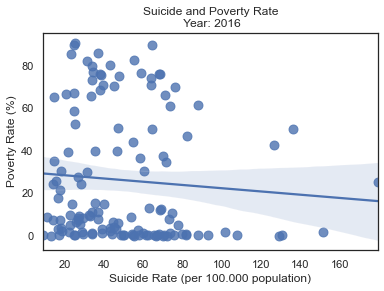

In [7]:
#plotting
sns.set_theme(style='white')

#plot suicide rate with poverty rate by country
sns.regplot(data = suiciderate_socioeconomic, x = 'suicide_rate', y = 'poverty_320', scatter_kws={"s": 80})
plt.title('Suicide and Poverty Rate\n Year: 2016')
plt.xlabel('Suicide Rate (per 100.000 population)')
plt.ylabel('Poverty Rate (%)')

plt.show